# WINE QUALITY PREDICTION 

The data was downloaded from UCI Machine Learning Repository. This dataset consists of red and white variants of the Portuguese "Vinho Verde" wine.The dataset describes the amount of various chemicals present in wine and their effect on it's quality. The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).Our task is to predict the quality of wine using the given data. 

What are the factors that affect the quality of wine?

Wine quality depends on a lot of factors like alcohol content,presence of sulphates,its pH values etc. The taste,smell and potency of the wine is defined by its chemical ingredients and its percentages in wines.

We will perform following tasks in our notebook:

1. Data Exploration (Understanding the dataset)
2. Data Wrangling (Data cleaning and Data Manipulation)
3. Data visualization
4. Data Exploratory Analysis
5. Analysis of quality with other factors (correlation)
6. Data Modeling (Machine Learning Models)
7. Building a classification 
8. Predict the outcome
9. Calculating the accuracy score
10. Findings and Results




Group Members :

Nidhi Yaduvanshi, 
Sai Shiva Ramakrishna Prasad. Aramandala, 
Pallabi Das, and 
Trishita Aditya

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed

# importing libraries for data analysis and data manipulation

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# loading the libraries for creating the plot

import matplotlib.pyplot as plt
import seaborn as sb
import math

In [3]:
# import the dataset from our local machine
Winedata = pd.read_csv("C:\\Users\\nidhi\\Downloads\\winequalityN.csv")
Winedata

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
# to see the number of rows and columns in our dataset
Winedata.shape

(6497, 13)

In [8]:
Winedata.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

Understanding the wine data columns
1. fixed acidity
most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2. volatile acidity
the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3. citric acid
found in small quantities, citric acid can add ‘freshness’ and flavor to wines

4. residual sugar
the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5. chlorides
the amount of salt in the wine

6. free sulfur dioxide
the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisul-fite ion; it prevents microbial growth and the oxidation of wine

7. total sulfur dioxide
amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8. density
the density of water is close to that of water depending on the percent alcohol and sugar con-tent

9. pH
describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3–4 on the pH scale

10. sulphates
a wine additive which can contribute to sulfur dioxide gas (S02) levels, which acts as an antimicrobial and antioxidant

11. alcohol
the percent alcohol content of the wine

12. quality
output variable (based on sensory data, score between 0 and 10)

13. type
This column will show the type of the wine whether it's a red wine or white wine


In [9]:
# to view any random sample of 8 rows
Winedata.sample(8)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1960,white,8.5,0.17,0.31,1.0,0.024,13.0,91.0,0.99300,2.79,0.37,10.1,5
1590,white,7.9,0.14,0.74,1.2,0.028,30.0,165.0,0.99100,3.08,0.82,12.3,6
4728,white,7.2,0.21,0.31,10.5,0.035,36.0,122.0,0.99478,3.12,0.40,10.6,6
5998,red,8.4,0.34,0.42,2.1,0.072,23.0,36.0,0.99392,3.11,0.78,12.4,6
742,white,7.0,0.20,0.37,2.0,0.030,26.0,136.0,0.99320,3.28,0.61,10.2,6
2458,white,7.8,0.32,0.33,10.4,0.031,47.0,194.0,0.99692,3.07,0.58,9.6,6
3439,white,6.7,0.40,0.22,8.8,0.052,24.0,113.0,0.99576,3.22,0.45,9.4,5
6027,red,10.5,0.43,0.35,3.3,0.092,24.0,70.0,0.99798,3.21,0.69,10.5,6


In [10]:
# let us try to see the first 5 lines of our data
Winedata.head()


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
# to see the descriptive statistics
Winedata.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [12]:
# let us check the data types of all the variables to get a better understanding of our data
Winedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [13]:
# to check skewness
Winedata.skew()

fixed acidity           1.722805
volatile acidity        1.495512
citric acid             0.473032
residual sugar          1.435000
chlorides               5.399849
free sulfur dioxide     1.220066
total sulfur dioxide   -0.001177
density                 0.503602
pH                      0.386966
sulphates               1.798467
alcohol                 0.565718
quality                 0.189623
dtype: float64

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>,
        <AxesSubplot:title={'center':'residual sugar'}>],
       [<AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>],
       [<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

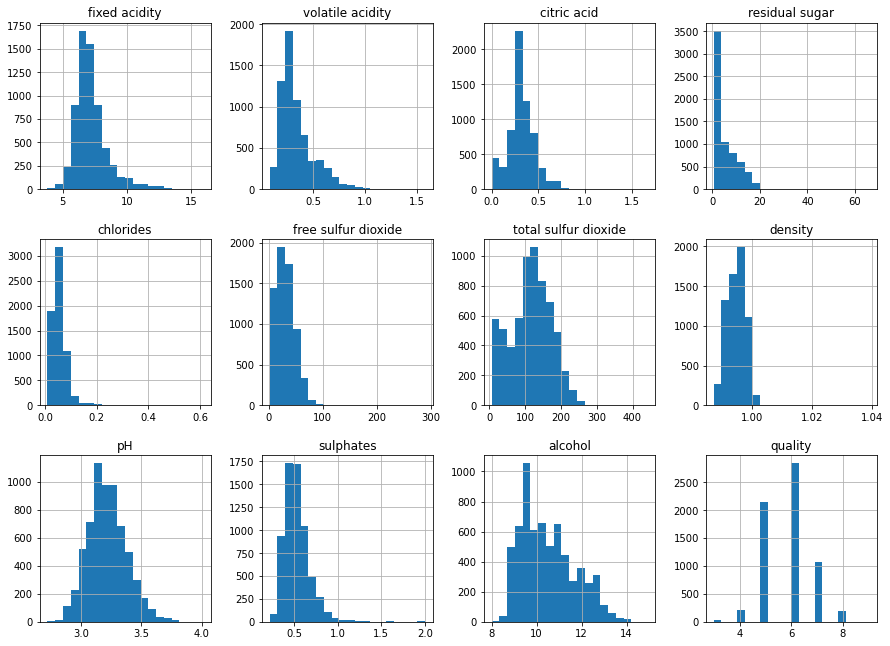

In [14]:
Winedata.hist(figsize=(15,15), layout=(4,4), bins=20)

**Observation** from histogram:

1. “fixed.acidity” is a measure of inside liquid concentration. 
    The histogram a right-skewed distributed with some outliers located at right side. 
    The most frequent values are between 7-8.
2. “volatile.acidity” is measure of acidity above-surface of liquid. 
    The histogram is right-skewed distributed with some outliers located at right side.
    The most frequent values are between 0.4-0.6.
3. “citric.acid” is right-skewed distributed with some outliers located at very right side. 
    The most frequent values 0. It’s also interesting a lot of wine have citric.acid = 0
4. “residual.sugar” is right-skewed distributed
5. “chlorides” is right-skewed distributed 
    The most frequent values are between 0.05-0.1
6. “free.sulfur.dioxide” is right-skewed distributed
7. “sulphates” is a right-skewed distributed

# Data Pre-processing

In [15]:
# to check for duplicates in the data
Winedata.duplicated()


0       False
1       False
2       False
3       False
4        True
        ...  
6492    False
6493    False
6494     True
6495    False
6496    False
Length: 6497, dtype: bool

In [16]:
#to check for the duplicate records in the dataset
Winedata.duplicated().sum()

1168

In [17]:
Winedata.shape

(6497, 13)

In [45]:
# to remove the duplicate records
Winedata.drop_duplicates(inplace=True)

In [46]:
Winedata.shape

(5329, 13)

In [47]:
Winedata.duplicated().sum()

0

In [18]:
# to find missing values
Winedata.isnull()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,False,False,False,False,False,False,False,False,False,False,False,False,False
6493,False,False,False,False,False,False,False,False,False,False,True,False,False
6494,False,False,False,False,False,False,False,False,False,False,False,False,False
6495,False,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
# to check for missing values
Winedata.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [26]:
Winedata=Winedata.dropna()
#After removing let's check whether all the missing values are removed
Winedata.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [27]:
#print the no. of labels for each class
print(Winedata.quality.value_counts())

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64


# Data Visualization - Exploratory Data Analysis

C:\Users\nidhi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


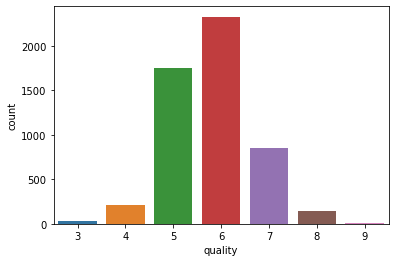

In [60]:
sb.countplot(Winedata['quality'])

plt.show()

<AxesSubplot:xlabel='type', ylabel='count'>

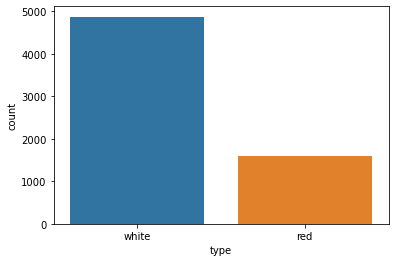

In [30]:
# to check the count of Red wine and white wine in the dataset
sb.countplot(x='type',data=Winedata)

<AxesSubplot:xlabel='type', ylabel='count'>

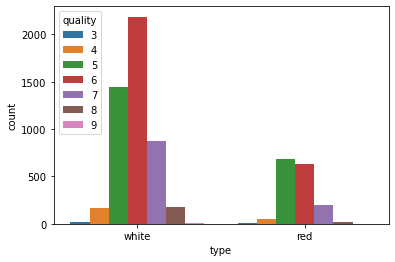

In [31]:
# plotting the data on the basis of type - univariate anlaysis
sb.countplot(x = 'type', hue = 'quality', data = Winedata)

* Dataset contains more information about white wine than red wine**

<AxesSubplot:xlabel='quality', ylabel='count'>

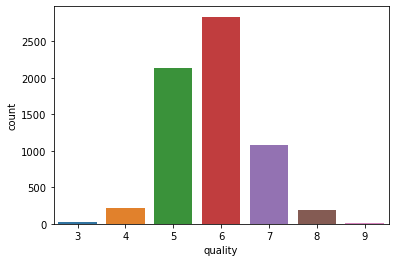

In [63]:
sb.countplot(x='quality', data=Winedata)

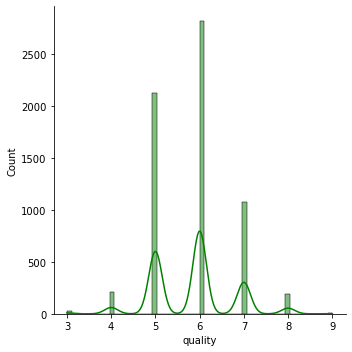

In [32]:
# plotting the data to check the quality 
sb.displot(x = Winedata['quality'], kde = True, color = 'green')

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

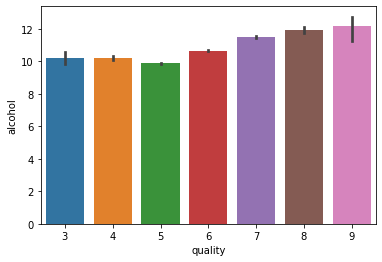

In [53]:
sb.barplot(x='quality',y='alcohol',data=Winedata)

<AxesSubplot:xlabel='quality', ylabel='pH'>

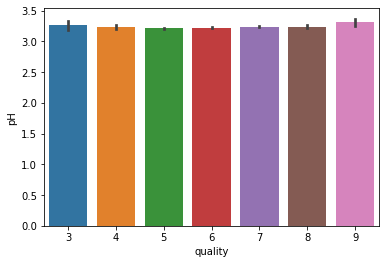

In [54]:
sb.barplot(x='quality',y='pH',data=Winedata)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

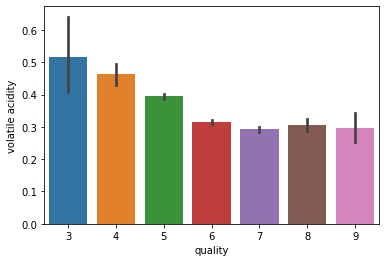

In [55]:
sb.barplot(x='quality',y='volatile acidity',data=Winedata)

In [ ]:
# As we can see, Mostly wine is of average quality 6

# > **ANALYSIS OF QUALITY WITH OTHER VARIOUS FACTORS**

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

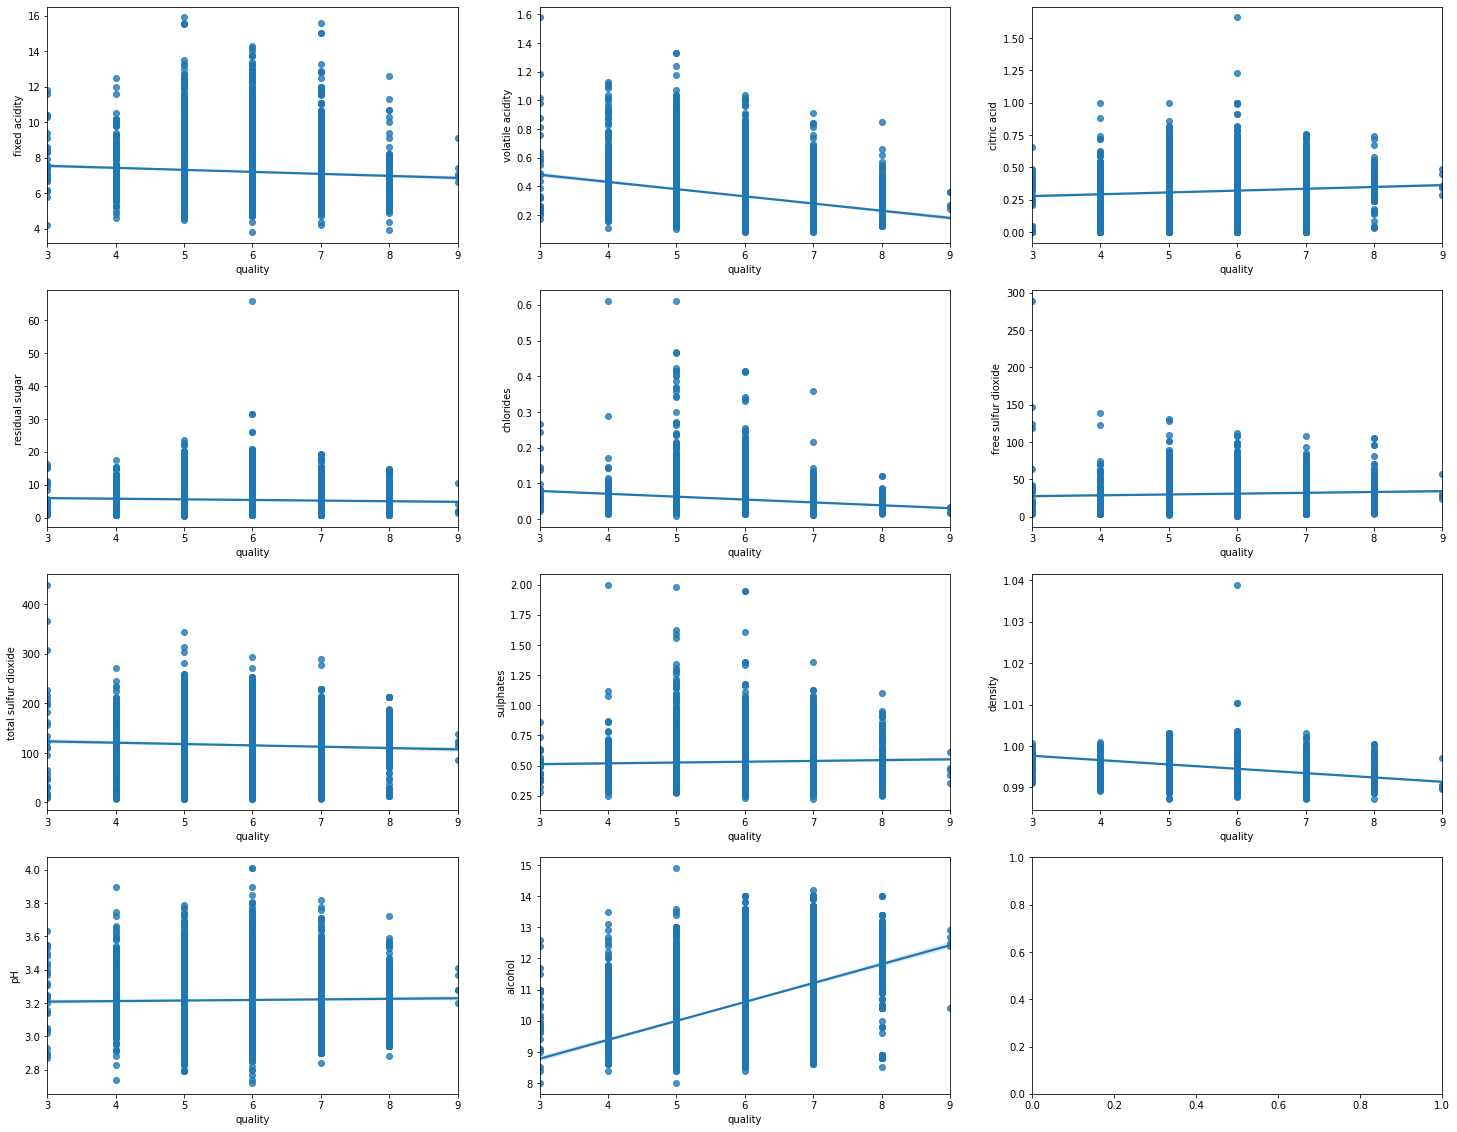

In [33]:
# to check the quality of wine with all other attributes
f, x = plt.subplots(4, 3, figsize = (25, 20)) 
sb.regplot(x = Winedata['quality'], y = Winedata['fixed acidity'], ax = x[0, 0])
sb.regplot(x = Winedata['quality'], y = Winedata['volatile acidity'], ax = x[0, 1])
sb.regplot(x = Winedata['quality'], y = Winedata['citric acid'], ax = x[0, 2])
sb.regplot(x = Winedata['quality'], y = Winedata['residual sugar'], ax = x[1, 0])
sb.regplot(x = Winedata['quality'], y = Winedata['chlorides'], ax = x[1, 1])
sb.regplot(x = Winedata['quality'], y = Winedata['free sulfur dioxide'], ax = x[1, 2])
sb.regplot(x = Winedata['quality'], y = Winedata['total sulfur dioxide'], ax = x[2, 0])
sb.regplot(x = Winedata['quality'], y = Winedata['sulphates'], ax = x[2, 1])
sb.regplot(x = Winedata['quality'], y = Winedata['density'], ax = x[2, 2])
sb.regplot(x = Winedata['quality'], y = Winedata['pH'], ax = x[3, 0])
sb.regplot(x = Winedata['quality'], y = Winedata['alcohol'], ax = x[3, 1])

Observations from the above plot:
* Quality increases sharply with decrease in volatile acidity
* Quality increases with increase in citric acid
* Quality increases sharply with increase in alcohol

In [142]:
#to see the correlation
Winedata.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.216524,0.329252,-0.106084,0.289903,-0.282025,-0.328631,0.478920,-0.269624,0.307044,-0.103657,-0.049871
volatile acidity,0.216524,1.000000,-0.382750,-0.164438,0.368266,-0.349784,-0.401231,0.308416,0.245329,0.226537,-0.066781,-0.143663
citric acid,0.329252,-0.382750,1.000000,0.146528,0.055266,0.130802,0.194231,0.095824,-0.342648,0.062121,-0.005124,0.060059
residual sugar,-0.106084,-0.164438,0.146528,1.000000,-0.123115,0.399579,0.487534,0.520194,-0.233319,-0.174663,-0.305311,-0.083970
chlorides,0.289903,0.368266,0.055266,-0.123115,1.000000,-0.187312,-0.270009,0.372126,0.025963,0.405771,-0.270196,-0.160716
free sulfur dioxide,-0.282025,-0.349784,0.130802,0.399579,-0.187312,1.000000,0.721308,0.005827,-0.141368,-0.199005,-0.169854,0.011845
total sulfur dioxide,-0.328631,-0.401231,0.194231,0.487534,-0.270009,0.721308,1.000000,0.005974,-0.222003,-0.275389,-0.247779,-0.067750
density,0.478920,0.308416,0.095824,0.520194,0.372126,0.005827,0.005974,1.000000,0.034979,0.283042,-0.668950,-0.294350
pH,-0.269624,0.245329,-0.342648,-0.233319,0.025963,-0.141368,-0.222003,0.034979,1.000000,0.166139,0.096615,0.048157
sulphates,0.307044,0.226537,0.062121,-0.174663,0.405771,-0.199005,-0.275389,0.283042,0.166139,1.000000,-0.019008,0.037557


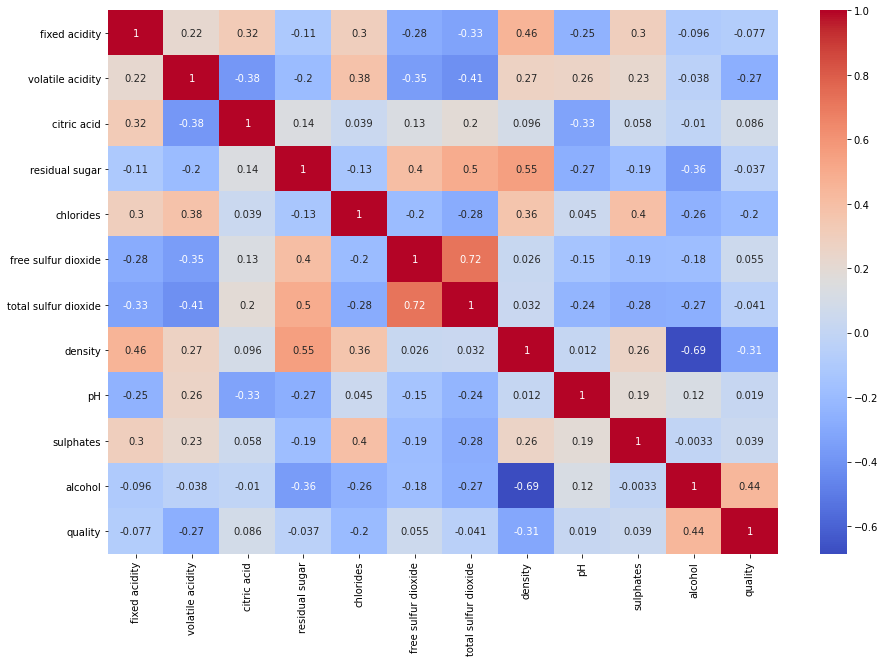

In [21]:
# plotting a heatmap to see the correlation of wine quality with other factors
plt.figure(figsize = (15, 10))
sb.heatmap(Winedata.corr(), annot = True,cmap='coolwarm')
plt.show()

Observation:

1. total sulfur dioxide is highly correlated with free sulfur dioxide
2. fixed acidity is highly correlated with density and citric acid
3. alcohol is highly correlated with quality
4. citric acid is inversely correlated with pH and volatile acidity

fixed acidity               AxesSubplot(0.125,0.71587;0.168478x0.16413)
volatile acidity         AxesSubplot(0.327174,0.71587;0.168478x0.16413)
citric acid              AxesSubplot(0.529348,0.71587;0.168478x0.16413)
residual sugar           AxesSubplot(0.731522,0.71587;0.168478x0.16413)
chlorides                  AxesSubplot(0.125,0.518913;0.168478x0.16413)
free sulfur dioxide     AxesSubplot(0.327174,0.518913;0.168478x0.16413)
total sulfur dioxide    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
density                 AxesSubplot(0.731522,0.518913;0.168478x0.16413)
pH                         AxesSubplot(0.125,0.321957;0.168478x0.16413)
sulphates               AxesSubplot(0.327174,0.321957;0.168478x0.16413)
alcohol                 AxesSubplot(0.529348,0.321957;0.168478x0.16413)
quality                 AxesSubplot(0.731522,0.321957;0.168478x0.16413)
dtype: object

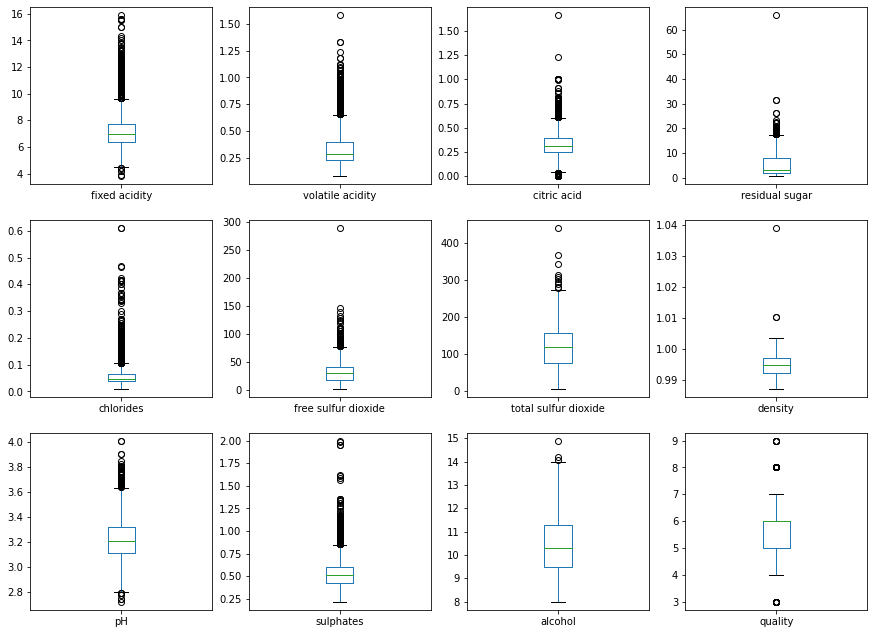

In [69]:
#checking outliers using box plot
Winedata.plot(kind="box",subplots=True,layout=(4,4),figsize=(15,15))

Observation from box plot:

“fixed.acidity” is a measure of inside liquid concentration. The histogram a right-skewed distributed with some outliers located at right side. The most frequent values are between 7-8.
“volatile.acidity” is measure of acidity above-surface of liquid. The histogram is right-skewed distributed with some outliers located at right side. The most frequent values are between 0.4-0.6.
“citric.acid” is right-skewed distributed with some outliers located at very right side. The most frequent values 0. It’s also interesting a lot of wine have citric.acid = 0
“residual.sugar” is right-skewed distributed
“chlorides” is right-skewed distributed The most frequent values are between 0.05-0.1
“free.sulfur.dioxide” is right-skewed distributed
“sulphates” is a right-skewed distributed

# Data Modeling:


In [ ]:
# importing all the required libraries for machine learning models

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [38]:
# let's categorize the quality column to apply classification model
# 1 is good qualit y and 0 is bad quality
Winedata['quality']=Winedata['quality'].apply (lambda x:1 if x > 6 else 0 )
Winedata.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [95]:
Winedata.sample(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4945,red,8.7,0.290,0.52,1.60,0.113,12.0,37.0,0.99690,3.25,0.58,9.5,0
912,white,6.3,0.340,0.19,5.80,0.041,22.0,145.0,0.99430,3.15,0.63,9.9,0
548,white,6.5,0.180,0.31,1.70,0.044,30.0,127.0,0.99280,3.49,0.50,10.2,1
350,white,6.3,0.120,0.36,2.10,0.044,47.0,146.0,0.99140,3.27,0.74,11.4,1
5949,red,8.5,0.460,0.59,1.40,0.414,16.0,45.0,0.99702,3.03,1.34,9.2,0
1127,white,6.4,0.125,0.29,5.85,0.042,24.0,99.0,0.99200,3.23,0.32,12.0,1
1140,white,8.5,0.160,0.33,1.00,0.076,17.0,57.0,0.99210,3.14,0.46,10.6,0
4395,white,6.6,0.240,0.22,12.30,0.051,35.0,146.0,0.99676,3.10,0.67,9.4,0
4040,white,6.3,0.240,0.29,1.60,0.052,48.0,185.0,0.99340,3.21,0.50,9.4,0
15,white,6.6,0.170,0.38,1.50,0.032,28.0,112.0,0.99140,3.25,0.55,11.4,1


In [162]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6


In [77]:
y.head()

0    6
1    6
2    6
3    6
6    6
Name: quality, dtype: int64

In [39]:
# divinding dataset into independent and dependent variables
#input split - DISCRETE(X) AND CATEGORICAL VARIABLE(Y)

x=Winedata.drop(['quality','type'], axis = 1)
y=Winedata['quality']

In [85]:
x.shape

(5329, 11)

    Splitting the data into training and testing model

In [40]:
from sklearn.model_selection import train_test_split


In [41]:
#model splitting with 30% test data and 70% train dataset


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [42]:
#Feature scaling - standardize the data to same scale
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [91]:
x_train

array([[-6.09071343e-01, -4.95364455e-01,  5.43707332e-01, ...,
        -8.37121346e-01,  2.89828723e-02, -3.93493362e-01],
       [-3.09907999e-01, -7.34440057e-01,  2.52161486e-03, ...,
        -1.51668423e-01,  2.25858629e-01,  1.96222690e-01],
       [-6.09071343e-01, -5.55133355e-01, -2.68071244e-01, ...,
        -8.37121346e-01,  2.91483881e-01,  1.88112569e+00],
       ...,
       [-6.09071343e-01, -5.55133355e-01,  2.84374663e+00, ...,
        -8.93545212e-02, -7.58520155e-01, -1.15169971e+00],
       [ 4.38000360e-01,  3.38961408e+00, -1.68868375e+00, ...,
         1.78006254e+00, -6.92894902e-01,  1.11977539e-01],
       [ 7.37163704e-01, -7.34440057e-01,  1.15254126e+00, ...,
        -1.27331866e+00, -1.34914742e+00,  2.77323892e-02]])

In [150]:
x_test.shape

(1599, 11)

In [159]:
x_train.shape


(3730, 11)

# Machine Learning Supervised model - classification method

In [51]:
#classify function - classification methods/models
def classify(model, x, y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
    #train the model
    model.fit(x_train,y_train)
    print("Accuracy:", model.score(x_test,y_test) * 100)
    
    

In [52]:
## model 1 - Random forest

reg=RandomForestClassifier(n_estimators=80)

reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
classify(reg,x,y)

Accuracy: 88.03506962351729


[[1506   60]
 [ 162  211]]


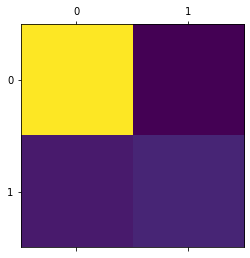

In [53]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

plt.matshow(cm)

In [62]:
# model 2 - Decision tree

DT=DecisionTreeClassifier()
classify(DT,x,y)


Accuracy: 82.98091799896854


In [55]:
### model 3 Naive bayes 
nb = GaussianNB()
nb.fit(x_train,y_train)
nb_predict=nb.predict(x_test)

In [56]:
#print confusion matrix and accuracy score
nb_conf_matrix = confusion_matrix(y_test, nb_predict)
nb_acc_score = accuracy_score(y_test, nb_predict)
print(nb_conf_matrix)
print(nb_acc_score*100)

[[1223  343]
 [ 138  235]]
75.19339865910263


[[1495   71]
 [ 258  115]]


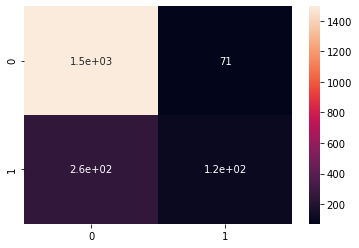

In [48]:
### model 4- lOGISTIC REGRESSION MODEL

#creating a instance for LR
LRmodel=LogisticRegression()

#fitting the model with  training data
LRmodel=LogisticRegression().fit(x_train,y_train)

#predicting the model with test data
pred_LR=LRmodel.predict(x_test)

#evalutaing the model
cm2=confusion_matrix(y_test,pred_LR)
print(cm2)
#plotting the CM
ax2=sb.heatmap(cm2,annot=True)
plt.show()


In [49]:
#evaluating the MODEL predictions
classification_report(y_test,pred_LR)
    

'              precision    recall  f1-score   support\n\n           0       0.85      0.95      0.90      1566\n           1       0.62      0.31      0.41       373\n\n    accuracy                           0.83      1939\n   macro avg       0.74      0.63      0.66      1939\nweighted avg       0.81      0.83      0.81      1939\n'

In [50]:
#evaluating the predictions
accuracy_score(y_test,pred_LR)
accuracy_score(y_test,pred_LR)*100


83.03249097472924

# RESULT:

1. The data was downloaded from UCI Machine Learning Repository.

2. The datasets contains 25% red and 75 % white variants of the Portuguese "Vinho Verde" wine.

3. Mostly wine is of the average quality 6. There are low poor and excellent quality wine

4. Quality increases sharply with decrease in volatile acidity

5. Quality increases with increase in citric acid

6. Quality increases sharply with increase in alcohol. Alcohol is highly correlated with quality

7. total sulfur dioxide is highly correlated with free sulfur dioxide

8. fixed acidity is highly correlated with density and citric acid

9. citric acid is inversely correlated with pH and volatile acidity

10. We used 4 classification machine learning algorithms for the model prediction

11. Random Forest classifier gives the highest accuracy of 88%

12. Logistic Regression gives the accuracy of 83%

13. Decision Tree gives the accuracy of 82.7%

14. Naive Bayes gives 75% accuracy of the model

15. We have also used feature scaling for standardizing the data to the same scale.

16. We have viewed the results using classification report and the confusion matrix.


Wine Recommendation:

Château Lafite Rothschild (Bordeaux, France)
Domaine de la Romanée-Conti (Burgundy, France)
Domaine Etienne Guigal (Rhone, France)